In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydraulic/fusion'


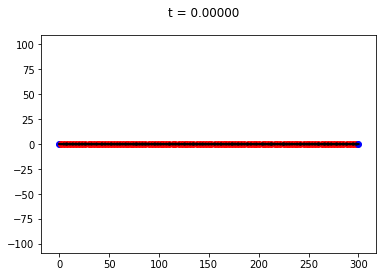

======= CHAIN =======
Type         : hydraulic
Total length : 299.9837575897586
Current Time : 0
======= PARAMETERS =======
tau : 1.0
======= LUMENS =======
Nb lumens : 100
Lumen 0 is at position 0.00000 with length 0.00000 and pumping 0.00000
Lumen 1 is at position 1.57480 with length 0.57480 and pumping 1.00000
Lumen 2 is at position 4.35470 with length 0.90131 and pumping 1.00000
Lumen 3 is at position 7.30887 with length 1.22657 and pumping 1.00000
Lumen 4 is at position 10.53183 with length 0.86732 and pumping 1.00000
Lumen 5 is at position 13.40997 with length 1.06778 and pumping 1.00000
Lumen 6 is at position 16.58197 with length 1.00223 and pumping 1.00000
Lumen 7 is at position 19.79099 with length 1.11513 and pumping 1.00000
Lumen 8 is at position 22.86614 with length 0.96210 and pumping 1.00000
Lumen 9 is at position 26.13797 with length 1.14358 and pumping 1.00000
Lumen 10 is at position 29.44725 with length 0.82478 and pumping 1.00000
Lumen 11 is at position 32.24009 with 

In [3]:
subdir='run0000'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)
print(ch)

In [6]:
path = os.path.join(main_dir, 'run0000')
Nt_0 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))
path = os.path.join(main_dir, 'run0001')
Nt_1 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))
path = os.path.join(main_dir, 'run0002')
Nt_2 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))
path = os.path.join(main_dir, 'run0003')
Nt_3 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))

#path = os.path.join(main_dir,)
#Nt_3_bis = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))

Text(0.5, 0, 'Time')

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


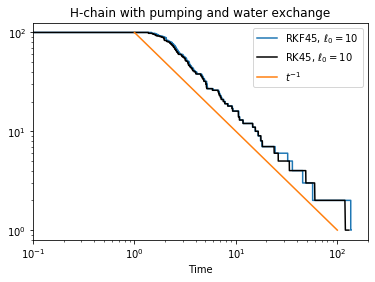

In [7]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1, 200)
#plt.plot(Nt_0[:, 0], Nt_0[:, 1], label='RKF45, $\ell_0=1$')
#plt.plot(Nt_1[:, 0], Nt_1[:, 1], label='RK45, $\ell_0=1$')

plt.plot(Nt_2[:, 0], Nt_2[:, 1], label='RKF45, $\ell_0=10$')
#plt.plot(Nt_3_bis[:, 0], Nt_3_bis[:, 1], label='RK45, $\ell_0=10$, larger tstep')
plt.plot(Nt_3[:, 0], Nt_3[:, 1], label='RK45, $\ell_0=10$', color='k')



k, a = 100, -1
t = np.logspace(0, 2, 101)
plt.plot(t, k*t**a, label = r'$t^{-1}$')
plt.legend()

plt.title('H-chain with pumping and water exchange')
plt.xlabel('Time')

Text(0.5, 1.0, 'H-chain with pumping, no water exchange')

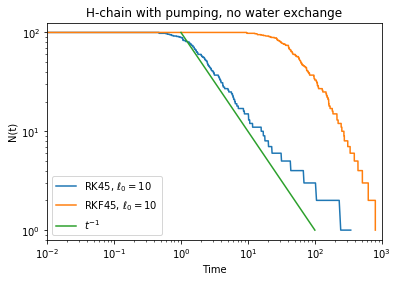

In [9]:
path = os.path.join(main_dir, 'run0004')
Nt_4 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))
path = os.path.join(main_dir, 'run0005')
Nt_5 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))

plt.xlim(1e-2, 1e3)
plt.xscale('log')
plt.yscale('log')
plt.plot(Nt_4[:, 0], Nt_4[:, 1], label='RK45, $\ell_0=10$')
plt.plot(Nt_5[:, 0], Nt_5[:, 1], label='RKF45, $\ell_0=10$')
k, a = 100, -1
t = np.logspace(0, 2, 101)
plt.plot(t, k*t**a, label = r'$t^{-1}$')
plt.legend()
plt.ylabel('N(t)')
plt.xlabel('Time')
plt.title('H-chain with pumping, no water exchange')

Import successful !


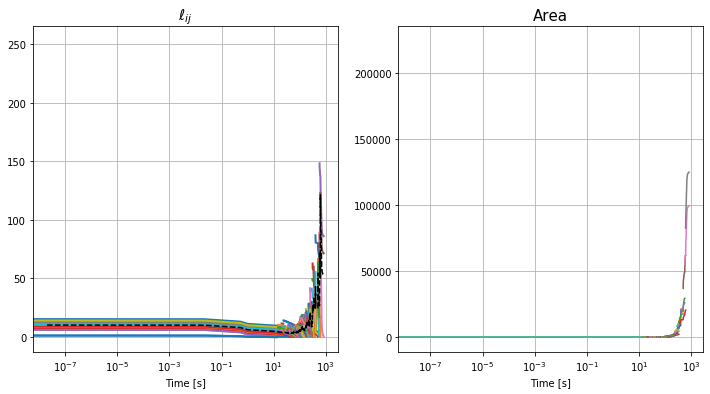

In [226]:

L, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=False)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

#savename = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')

show_area=0
savefig=False
x_log=True

tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(12, 6))






Text(0.5, 1.0, 'H-chain with pumping and attenuated water exchange')

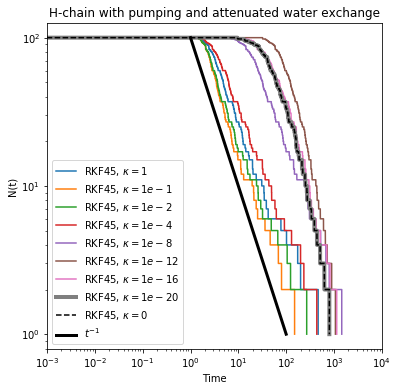

In [28]:
path = os.path.join(main_dir, '')
Nt_k1 = np.loadtxt(os.path.join(path, 'sim_nlum_1.dat'))
Nt_k1e_1 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-1.dat'))
Nt_k1e_2 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-2.dat'))
#Nt_k1e_3 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-3.dat'))
Nt_k1e_4 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-4.dat'))
Nt_k1e_8 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-8.dat'))
Nt_k1e_12 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-12.dat'))
Nt_k1e_16 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-16.dat'))
Nt_k1e_20 = np.loadtxt(os.path.join(path, 'sim_nlum_1e-20.dat'))
Nt_k0 = np.loadtxt(os.path.join(path, 'sim_nlum_0.dat'))
#path = os.path.join(main_dir, 'run0005')
#Nt_5 = np.loadtxt(os.path.join(path, 'sim_nlum.dat'))

plt.figure(figsize=(6, 6))
plt.xlim(1e-3, 1e4)
plt.xscale('log')
plt.yscale('log')
plt.plot(Nt_k1[:, 0], Nt_k1[:, 1], label='RKF45, $\kappa=1$')
plt.plot(Nt_k1e_1[:, 0], Nt_k1e_1[:, 1], label='RKF45, $\kappa=1e-1$')
plt.plot(Nt_k1e_2[:, 0], Nt_k1e_2[:, 1], label='RKF45, $\kappa=1e-2$')
#plt.plot(Nt_k1e_3[:, 0], Nt_k1e_3[:, 1], label='RKF45, $\kappa=1e-3$')
plt.plot(Nt_k1e_4[:, 0], Nt_k1e_4[:, 1], label='RKF45, $\kappa=1e-4$')
plt.plot(Nt_k1e_8[:, 0], Nt_k1e_8[:, 1], label='RKF45, $\kappa=1e-8$')
plt.plot(Nt_k1e_12[:, 0], Nt_k1e_12[:, 1], label='RKF45, $\kappa=1e-12$')
plt.plot(Nt_k1e_16[:, 0], Nt_k1e_16[:, 1], label='RKF45, $\kappa=1e-16$')
plt.plot(Nt_k1e_20[:, 0], Nt_k1e_20[:, 1], label='RKF45, $\kappa=1e-20$', linewidth=4)
plt.plot(Nt_k0[:, 0], Nt_k0[:, 1], label='RKF45, $\kappa=0$', color='k', linestyle='--')
k, a = 100, -1
t = np.logspace(0, 2, 101)
plt.plot(t, k*t**a, label = r'$t^{-1}$', color='k', linewidth=3)
plt.legend(loc=3)
plt.ylabel('N(t)')
plt.xlabel('Time')
plt.title('H-chain with pumping and attenuated water exchange')